In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_circles

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

## Question 1

In [2]:
from random import random

In [3]:
def initialize_network(n_inputs, n_outputs):
    network = list()
    n_inputs= n_inputs.shape[1]
    n_outputs = n_outputs.shape[0]
    hidden_layer = [{'weights':[random() for i in range(n_inputs)]} for i in range(1)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

## Question 2

In [4]:
def logistic(z):
    logistic_values = 1 / (1 + exp(-z))
    return logistic_values

## Question 3

In [5]:
def relu(z):
    relu_values = max(0,z)
    return relu_values

## Question 4

In [6]:
def tanh(z):
    tanh_values = np.tanh(z)
    return tanh_values

In [7]:
def validation_splits(X, y, test_size):
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size, random_state=42)
    return X_train, X_validation, y_train, y_validation

## Question 5

In [8]:
clf_mlp = MLPClassifier()

## Question 6

In [9]:
digits = load_digits()

In [10]:
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

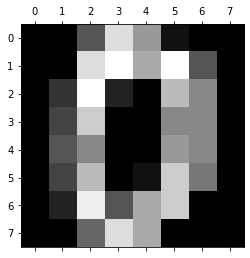

In [11]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

# Question 7 

In [12]:
X = digits.data
y = digits.target


from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  

# fit only on the training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  

# apply same transformation to test data
X_test = scaler.transform(X_test)


## Question 9

In [13]:
param_grid = { 'hidden_layer_sizes': [(3,), (5,), (10,)], 'solver':['sgd'],
              'alpha': [0.0001,0.001,0.01,0.1], 'activation' : ['logistic','tanh', 'relu'],  
              'learning_rate' : ['constant' , 'adaptive'],
              'learning_rate_init' :[0.001,0.01,0.1],
              'max_iter' : [1000,800,600,400,200],
              'tol' : [0.0001, 0.001, 0.01, 0.1],
              'verbose': [3],
              'early_stopping':[True],
              'n_iter_no_change' : [10,5,2]}

In [16]:
## Used this code from the workbook

clf_mlp_cv = GridSearchCV(clf_mlp, param_grid, scoring='accuracy', cv=2, verbose=3, n_jobs=4)
clf_mlp_cv.fit(X_train, y_train)

Fitting 2 folds for each of 12960 candidates, totalling 25920 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 612 tasks      | elapsed:   13.0s
[Parallel(n_jobs=4)]: Done 1309 tasks      | elapsed:   30.1s
[Parallel(n_jobs=4)]: Done 1972 tasks      | elapsed:   45.9s
[Parallel(n_jobs=4)]: Done 2920 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 4324 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 5776 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 7676 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 9360 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 11740 tasks      | elapsed:  4.9min
[Parallel(n_jobs=4)]: Done 14428 tasks      | elapsed:  6.2min
[Parallel(n_jobs=4)]: Done 17372 tasks      | elapsed:  7.5min
[Parallel(n_jobs=4)]: Done 20572 tasks      | elapsed:  9.0min
[Parallel(n_jobs=4)]: Done 24028 tasks      | elapsed: 10.7min
[Parallel(n_jobs=4)]: Done 25920 out of 25920 | elapse

Iteration 1, loss = 2.04936330
Validation score: 0.638889
Iteration 2, loss = 1.18852494
Validation score: 0.798611
Iteration 3, loss = 0.76983102
Validation score: 0.826389
Iteration 4, loss = 0.52413644
Validation score: 0.847222
Iteration 5, loss = 0.37517798
Validation score: 0.861111
Iteration 6, loss = 0.28915271
Validation score: 0.875000
Iteration 7, loss = 0.23525373
Validation score: 0.868056
Iteration 8, loss = 0.19820975
Validation score: 0.868056
Iteration 9, loss = 0.16938042
Validation score: 0.888889
Iteration 10, loss = 0.14842460
Validation score: 0.888889
Iteration 11, loss = 0.13145707
Validation score: 0.888889
Iteration 12, loss = 0.11741819
Validation score: 0.881944
Iteration 13, loss = 0.10690119
Validation score: 0.881944
Iteration 14, loss = 0.09885464
Validation score: 0.888889
Iteration 15, loss = 0.09176746
Validation score: 0.881944
Iteration 16, loss = 0.08566708
Validation score: 0.888889
Iteration 17, loss = 0.08025969
Validation score: 0.888889
Iterat

GridSearchCV(cv=2, estimator=MLPClassifier(), n_jobs=4,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'early_stopping': [True],
                         'hidden_layer_sizes': [(3,), (5,), (10,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [1000, 800, 600, 400, 200],
                         'n_iter_no_change': [10, 5, 2], 'solver': ['sgd'],
                         'tol': [0.0001, 0.001, 0.01, 0.1], 'verbose': [3]},
             scoring='accuracy', verbose=3)

In [17]:
params_optimal_mlp = clf_mlp_cv.best_params_

print("Best Score (accuracy): %f" % clf_mlp_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_mlp)
print("\n")

Best Score (accuracy): 0.942241
Optimal Hyperparameter Values:  {'activation': 'tanh', 'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'max_iter': 600, 'n_iter_no_change': 10, 'solver': 'sgd', 'tol': 0.001, 'verbose': 3}




### Optimal Hyperparameter Values:  {'activation': 'tanh', 'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'max_iter': 600, 'n_iter_no_change': 10, 'solver': 'sgd', 'tol': 0.001, 'verbose': 3}

In [13]:
param_grid_optimal = { 'hidden_layer_sizes': [(10,)], 'solver':['sgd'],
              'alpha': [0.001], 'activation' : ['tanh'],  
              'learning_rate' : ['adaptive'],
              'learning_rate_init': [0.1],
              'max_iter' : [600],
              'tol' : [0.001],
              'verbose': [10],
              'early_stopping':[True],
              'n_iter_no_change' : [10]}

In [14]:
mlp_clf = MLPClassifier(random_state=42, hidden_layer_sizes=(10, ), alpha=0.001, solver='sgd',
                      max_iter=600, n_iter_no_change = 10, learning_rate='adaptive',learning_rate_init = 0.1, activation='logistic', tol = 0.001,
                    verbose=10, early_stopping = True)
mlp_clf.fit(X_train, y_train)

Iteration 1, loss = 2.32677393
Validation score: 0.173611
Iteration 2, loss = 2.14706435
Validation score: 0.534722
Iteration 3, loss = 1.94559840
Validation score: 0.694444
Iteration 4, loss = 1.68449718
Validation score: 0.791667
Iteration 5, loss = 1.42182684
Validation score: 0.833333
Iteration 6, loss = 1.19175239
Validation score: 0.847222
Iteration 7, loss = 1.00276736
Validation score: 0.881944
Iteration 8, loss = 0.85476246
Validation score: 0.902778
Iteration 9, loss = 0.73406049
Validation score: 0.923611
Iteration 10, loss = 0.63650775
Validation score: 0.944444
Iteration 11, loss = 0.55514530
Validation score: 0.958333
Iteration 12, loss = 0.48990015
Validation score: 0.958333
Iteration 13, loss = 0.43657108
Validation score: 0.965278
Iteration 14, loss = 0.39259567
Validation score: 0.979167
Iteration 15, loss = 0.35730188
Validation score: 0.979167
Iteration 16, loss = 0.32756785
Validation score: 0.979167
Iteration 17, loss = 0.30264980
Validation score: 0.979167
Iterat

MLPClassifier(activation='logistic', alpha=0.001, early_stopping=True,
              hidden_layer_sizes=(10,), learning_rate='adaptive',
              learning_rate_init=0.1, max_iter=600, random_state=42,
              solver='sgd', tol=0.001, verbose=10)

In [21]:
validation_scores = mlp_clf.validation_scores_
validation_loss = mlp_clf.loss_curve_

In [15]:
mlp_clf_for_train_loss = MLPClassifier(random_state=42, hidden_layer_sizes=(10, ), alpha=0.001, solver='sgd',
                      max_iter=600, n_iter_no_change = 5, learning_rate='adaptive',learning_rate_init = 0.1, activation='logistic', tol = 0.001,
                    verbose=10, early_stopping = False)
mlp_clf_for_train_loss.fit(X_train, y_train)
train_curve_loss = mlp_clf_for_train_loss.loss_curve_

Iteration 1, loss = 2.31680675
Iteration 2, loss = 2.11073239
Iteration 3, loss = 1.85807125
Iteration 4, loss = 1.55304091
Iteration 5, loss = 1.27046769
Iteration 6, loss = 1.04303337
Iteration 7, loss = 0.86724393
Iteration 8, loss = 0.72960734
Iteration 9, loss = 0.61883085
Iteration 10, loss = 0.53335840
Iteration 11, loss = 0.46431562
Iteration 12, loss = 0.40877098
Iteration 13, loss = 0.36551199
Iteration 14, loss = 0.32995993
Iteration 15, loss = 0.30161662
Iteration 16, loss = 0.27800450
Iteration 17, loss = 0.25751772
Iteration 18, loss = 0.24108035
Iteration 19, loss = 0.22673658
Iteration 20, loss = 0.21412046
Iteration 21, loss = 0.20293742
Iteration 22, loss = 0.19308349
Iteration 23, loss = 0.18426923
Iteration 24, loss = 0.17656102
Iteration 25, loss = 0.16912276
Iteration 26, loss = 0.16268820
Iteration 27, loss = 0.15678801
Iteration 28, loss = 0.15088539
Iteration 29, loss = 0.14587784
Iteration 30, loss = 0.14101754
Iteration 31, loss = 0.13672817
Iteration 32, los

## Question 10

### Question 10.A

### I created the functions below to make the list for the Print out's for ETA, since the classifier doesn't actually save these, and the print out doesn't print out the ETA every step.

In [16]:
def ETA_Creation (validation_score, ETA, n_iter_change):
    # Takes validation score list, the initial learning rate (ETA), the number of iterations before stop
    # It than looks at the number of consecutive changes, and then changes the learning rate by dividing by itself.
    a = 0 
    list_of_ETA = []
    for i in range (len(validation_score)):
        #print(i)
        if i == (len(validation_score)-1):
            #print("Ending")
            list_of_ETA.append("Early stopping because the validation score change is less than 0.001 over the last 10 epochs.")
        else:
            if ((validation_score[i] - validation_score[i-1]) <= 0.001) or (np.abs(validation_score[i] - validation_score[i+1])<= 0.001):
                #print("similar",i, validation_score[i], ETA)
                a += 1
                if a == n_iter_change:
                    ETA = ETA / 5
                    list_of_ETA.append(ETA)
                    a = 0
                else:
                    list_of_ETA.append(ETA)
            else:
                #print("not similar",i, validation_score[i],ETA)
                a = 0
                list_of_ETA.append(ETA)
    return list_of_ETA

In [17]:
def rounded(X, decimal):
    if type(X) == "array":
        round_value = np.around(X, decimal)
        X_rounded = list(round_value)
    else:
        X_array = np.array(X)
        rounded_value = np.around(X_array, decimal)
        X_rounded = list(rounded_value)
        
    return X_rounded

In [24]:
list_of_ETA = ETA_Creation(validation_scores, 0.1, 10)

validation_loss_rounded = rounded(validation_loss, 8)
validation_score_rounded = rounded(validation_scores, 8)
train_loss_rounded = rounded(train_curve_loss, 8)

## I was unable to access the training data from the MLP Classifier that the SKlearn uses. The reason for this is that in the SKlearn documentation, when using the early stop, doesn't save the training loss score. Early stop only looks at the validation score and if there is enough change based upon the tol. But with Early stop turned off instead of looking at the validation score it's looking at the training instead, but it doesn't stop. Because of this the training loss value wouldn't change based upon if early stop is on or off. Becasue of this i utilize this assumption in order to get the trianing loss value. That was what i was attempting to do with the above print out. 

In [25]:
for i in range(len(validation_loss)):
    if i == (len(validation_loss)-1):
        print("Epoch", i,"out of", (len(validation_loss)-1),"| ", list_of_ETA[i])
    else:
        print("Epoch", i,"out of", (len(validation_loss)-1), "|  Training Loss:", train_loss_rounded[i], "|  Validation Loss", validation_loss_rounded[i], "|  Validation Score:", validation_score_rounded[i], "ETA:", list_of_ETA[i] )


Epoch 0 out of 120 |  Training Loss: 2.31680675 |  Validation Loss 2.32677393 |  Validation Score: 0.17361111 ETA: 0.1
Epoch 1 out of 120 |  Training Loss: 2.11073239 |  Validation Loss 2.14706435 |  Validation Score: 0.53472222 ETA: 0.1
Epoch 2 out of 120 |  Training Loss: 1.85807125 |  Validation Loss 1.9455984 |  Validation Score: 0.69444444 ETA: 0.1
Epoch 3 out of 120 |  Training Loss: 1.55304091 |  Validation Loss 1.68449718 |  Validation Score: 0.79166667 ETA: 0.1
Epoch 4 out of 120 |  Training Loss: 1.27046769 |  Validation Loss 1.42182684 |  Validation Score: 0.83333333 ETA: 0.1
Epoch 5 out of 120 |  Training Loss: 1.04303337 |  Validation Loss 1.19175239 |  Validation Score: 0.84722222 ETA: 0.1
Epoch 6 out of 120 |  Training Loss: 0.86724393 |  Validation Loss 1.00276736 |  Validation Score: 0.88194444 ETA: 0.1
Epoch 7 out of 120 |  Training Loss: 0.72960734 |  Validation Loss 0.85476246 |  Validation Score: 0.90277778 ETA: 0.1
Epoch 8 out of 120 |  Training Loss: 0.61883085 |

### Question 10.B

Text(0, 0.5, 'Validation Score')

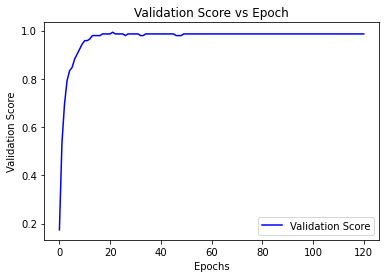

In [26]:
plt.plot(mlp_clf.validation_scores_, '-b', label = "Validation Score")
plt.legend()
plt.title("Validation Score vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Validation Score")


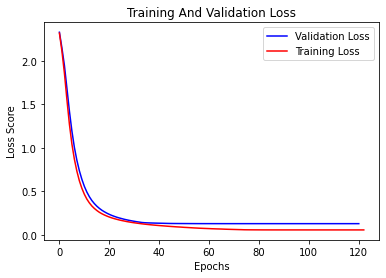

In [27]:
plt.plot(mlp_clf.loss_curve_, '-b', label = "Validation Loss")
plt.plot(mlp_clf_for_train_loss.loss_curve_, '-r', label = "Training Loss")
plt.title("Training And Validation Loss") 
plt.xlabel("Epochs")
plt.ylabel("Loss Score")
plt.legend()
validation_loss = mlp_clf.loss_curve_
validation_score = mlp_clf.validation_scores_


### Question 10.C

In [28]:
print("Training Data")

y_train_predicted = mlp_clf.predict(X_train)

train_accuracy_mlp = np.mean(y_train_predicted == y_train)
print("\nTraining Accuracy: ", train_accuracy_mlp)

train_size = X_train.shape[0]
train_no_correct = train_size  * train_accuracy_mlp

print ("\nTrain - No. Of Correct Predictions", train_no_correct, "/", train_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_train, y_train_predicted))


precision_test = precision_score(y_train, y_train_predicted,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_train, y_train_predicted,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_train, y_train_predicted,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_train, y_train_predicted))

Training Data

Training Accuracy:  0.9770354906054279

Train - No. Of Correct Predictions 1404.0 / 1437

Test Confusion Matrix:
[[143   0   0   0   1   0   1   0   0   0]
 [  0 150   0   0   1   0   0   0   2   1]
 [  0   2 141   1   0   0   0   0   0   0]
 [  0   0   0 148   0   0   0   0   1   0]
 [  0   1   0   0 130   0   0   2   0   2]
 [  0   0   0   0   1 132   0   0   0   2]
 [  0   1   0   0   0   0 145   0   0   0]
 [  0   0   0   0   0   0   0 145   0   0]
 [  0   5   0   0   0   1   2   0 136   0]
 [  0   0   0   1   0   2   0   1   2 134]]

Test Precision = 0.977182
Test Recall = 0.977035
Test F1 Score = 0.977033

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       145
           1       0.94      0.97      0.96       154
           2       1.00      0.98      0.99       144
           3       0.99      0.99      0.99       149
           4       0.98      0.96      0.97       135
           5     

In [29]:
print("Test Data")

y_test_predicted = mlp_clf.predict(X_test)

test_accuracy_mlp = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy_mlp)

test_size = X_test.shape[0]
test_no_correct = test_size  * test_accuracy_mlp

print ("\nTest - No. Of Correct Predictions", test_no_correct, "/", test_size)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


precision_test = precision_score(y_test, y_test_predicted,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, y_test_predicted,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

Test Data

Test Accuracy:  0.9638888888888889

Test - No. Of Correct Predictions 347.0 / 360

Test Confusion Matrix:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 27  1  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  1 32  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  2  0  0  0  1  0  0 27  0]
 [ 0  0  0  1  0  1  0  0  0 38]]

Test Precision = 0.965135
Test Recall = 0.963889
Test F1 Score = 0.963983

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      0.96      0.95        28
           2       0.94      1.00      0.97        33
           3       0.97      0.94      0.96        34
           4       0.98      1.00      0.99        46
           5       0.90      0.96      0.93        47
           6       0.97      0.97      0.97        35
           7       1